In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from sklearn.metrics import silhouette_score





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894075 sha256=ed8d9156fcc6d5344771c6b6b4b9e62126dbe6ee6b6543bb1c38bb9b1a6dd6d9
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
# Load the data
file_path = 'RFM_clustered.csv'
data = pd.read_csv(file_path)
# Select R, F, M, T columns for clustering
rfmt_data = data[['R_Score', 'F_Score', 'M_Score', 'T_Score']]

In [ ]:
# Apply K-means clustering with k = 4
kmeans_RFMT = KMeans(init="random",
                n_clusters=4,
                n_init=10,
                max_iter=300,
                random_state=42)
kmeans_clusters_RFMT = kmeans_RFMT.fit_predict(rfmt_data)


# Add the cluster labels to the original data
data['kmeans_Cluster_RFMT'] = kmeans_clusters_RFMT

# Compute means
kmeans_centroids=data.groupby('kmeans_Cluster_RFMT')[['Transaction_Count', 'Days_Since_Last_Transaction', 'Average_Spending', 'Tenure']].mean()

In [ ]:
kmeans_centroids

,Transaction_Count,Days_Since_Last_Transaction,Average_Spending,Tenure
kmeans_Cluster_RFMT,,,,
0,12.780059,123.187683,2537.091480,20.656891
1,70.414226,71.198745,1928.367361,27.774059
2,21.241042,226.094463,1784.713628,39.400651
3,24.886850,197.801223,1255.526545,15.764526


In [ ]:
# Apply K-medoids
kmedoids_pam_RFMT = KMedoids(n_clusters=4, method='pam', random_state=42)
kmedoids_pam_clusters_RFMT = kmedoids_pam_RFMT.fit_predict(rfmt_data)

In [ ]:
# Apply HAC
agg_clustering_RFMT = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg_clusters_RFMT = agg_clustering_RFMT.fit_predict(rfmt_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:


# Apply Fuzzy C-Means
rfmt_data_T = rfmt_data.values.T
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    rfmt_data_T, 4, 2, error=0.005, maxiter=1000, init=None)

# Get clusters' labels
fuzzy_cluster_labels_RFMT = np.argmax(u, axis=0)

In [ ]:
# Calculate average silhouette score
agg_silhouette_avg_RFMT = silhouette_score(rfmt_data, agg_clusters_RFMT)
print(f'agg_Silhouette Score_RFMT: {agg_silhouette_avg_RFMT:.3f}')
kmedoids_pam_silhouette_avg_RFMT = silhouette_score(rfmt_data, kmedoids_pam_clusters_RFMT)
print(f'kmedoids_pam_Silhouette_RFMT Score: {kmedoids_pam_silhouette_avg_RFMT:.3f}')
kmeans_silhouette_avg_RFMT = silhouette_score(rfmt_data, kmeans_clusters_RFMT)
print(f'kmeans_Silhouette Score_RFMT: {kmeans_silhouette_avg_RFMT:.3f}')
fuzzy_silhouette_avg_RFMT = silhouette_score(rfmt_data_T.T, fuzzy_cluster_labels_RFMT)
print(f'fuzzy_Silhouette Score: {fuzzy_silhouette_avg_RFMT:.3f}')

agg_Silhouette Score_RFMT: 0.179
kmedoids_pam_Silhouette_RFMT Score: 0.198
kmeans_Silhouette Score_RFMT: 0.220
fuzzy_Silhouette Score: 0.208


In [ ]:
# Get subset of data
data_t1 = data[data['T_Score'] == 1]
data_t2 = data[data['T_Score'] == 2]
data_t3 = data[data['T_Score'] == 3]

In [ ]:
kmeans_centroids1=data_t1.groupby('kmeans_Cluster_RFMT')[['Transaction_Count', 'Days_Since_Last_Transaction', 'Average_Spending']].mean()
kmeans_centroids2=data_t2.groupby('kmeans_Cluster_RFMT')[['Transaction_Count', 'Days_Since_Last_Transaction', 'Average_Spending']].mean()
kmeans_centroids3=data_t3.groupby('kmeans_Cluster_RFMT')[['Transaction_Count', 'Days_Since_Last_Transaction', 'Average_Spending']].mean()

In [ ]:
kmeans_centroids1

,Transaction_Count,Days_Since_Last_Transaction,Average_Spending
kmeans_Cluster_RFMT,,,
0,14.651899,134.601266,2518.708144
1,67.427350,59.974359,1965.654143
3,28.061905,193.014286,1323.956730


In [ ]:
kmeans_centroids2

,Transaction_Count,Days_Since_Last_Transaction,Average_Spending
kmeans_Cluster_RFMT,,,
0,12.551471,130.536765,2484.434186
1,74.605405,83.735135,1931.676627
2,28.434783,259.586957,1861.786899
3,19.188034,206.393162,1132.703135


In [ ]:
kmeans_centroids3

,Transaction_Count,Days_Since_Last_Transaction,Average_Spending
kmeans_Cluster_RFMT,,,
0,7.148936,63.553191,2751.260820
1,67.994318,65.482955,1900.101634
2,19.973180,220.191571,1771.129833


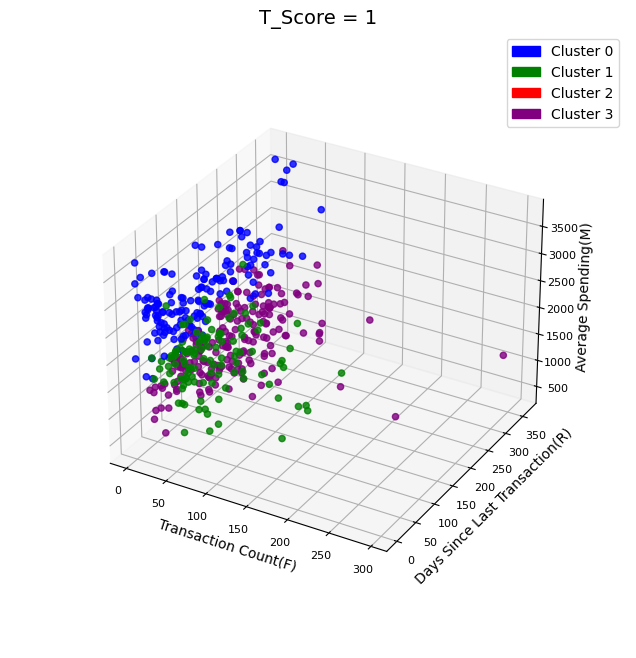

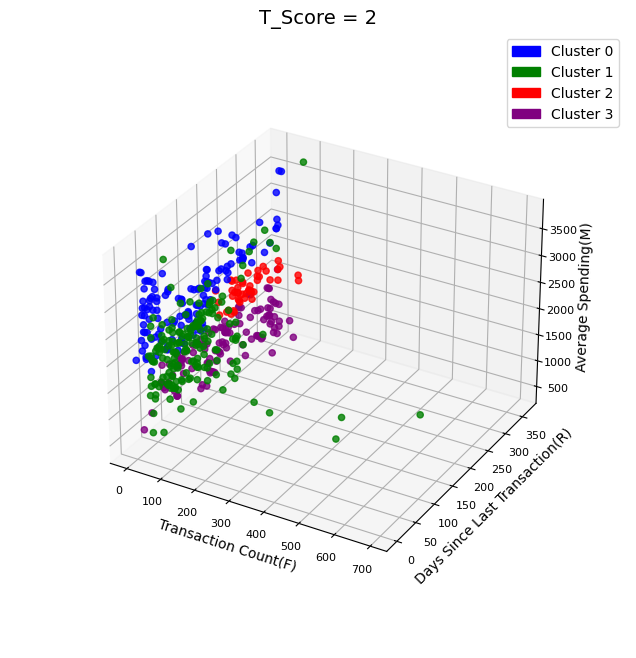

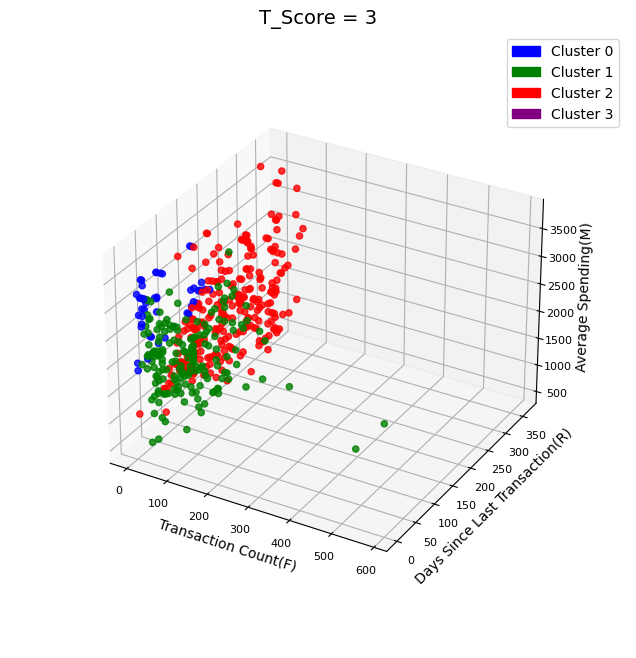

In [ ]:
# Plot 3D scatter


# Define color map
color_discrete_map = {
    0: 'blue',
    1: 'green',
    2: 'red',
    3: 'purple'
}
legend_handles = [mpatches.Patch(color=color, label=f'Cluster {key}') for key, color in color_discrete_map.items()]
#  T_Score = 1
fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(
    data_t1['Transaction_Count'],
    data_t1['Days_Since_Last_Transaction'],
    data_t1['Average_Spending'],
    c=[color_discrete_map[val] for val in data_t1['kmeans_Cluster_RFMT']],
    s=20,
    alpha=0.8
)
ax1.set_title('T_Score = 1', fontsize=14)
ax1.set_xlabel('Transaction Count(F)', fontsize=10)
ax1.set_ylabel('Days Since Last Transaction(R)', fontsize=10)
ax1.set_zlabel('Average Spending(M)', fontsize=10)
ax1.tick_params(axis='x', labelsize=8)
ax1.tick_params(axis='y', labelsize=8)
ax1.tick_params(axis='z', labelsize=8)
ax1.set_box_aspect(aspect=None, zoom=0.8)
ax1.legend(handles=legend_handles, loc='best')
#  T_Score = 2
fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(
    data_t2['Transaction_Count'],
    data_t2['Days_Since_Last_Transaction'],
    data_t2['Average_Spending'],
    c=[color_discrete_map[val] for val in data_t2['kmeans_Cluster_RFMT']],
    s=20,
    alpha=0.8
)
ax2.set_title('T_Score = 2', fontsize=14)
ax2.set_xlabel('Transaction Count(F)', fontsize=10)
ax2.set_ylabel('Days Since Last Transaction(R)', fontsize=10)
ax2.set_zlabel('Average Spending(M)', fontsize=10)
ax2.tick_params(axis='x', labelsize=8)
ax2.tick_params(axis='y', labelsize=8)
ax2.tick_params(axis='z', labelsize=8)
ax2.set_box_aspect(aspect=None, zoom=0.8)
ax2.legend(handles=legend_handles, loc='best')
#  T_Score = 3
fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.scatter(
    data_t3['Transaction_Count'],
    data_t3['Days_Since_Last_Transaction'],
    data_t3['Average_Spending'],
    c=[color_discrete_map[val] for val in data_t3['kmeans_Cluster_RFMT']],
    s=20,
    alpha=0.8
)
ax3.set_title('T_Score = 3', fontsize=14)
ax3.set_xlabel('Transaction Count(F)', fontsize=10)
ax3.set_ylabel('Days Since Last Transaction(R)', fontsize=10)
ax3.set_zlabel('Average Spending(M)', fontsize=10)
ax3.tick_params(axis='x', labelsize=8)
ax3.tick_params(axis='y', labelsize=8)
ax3.tick_params(axis='z', labelsize=8)
ax3.set_box_aspect(aspect=None, zoom=0.8)
ax3.legend(handles=legend_handles, loc='best')
# Show plots

plt.show()